In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)


In [3]:
# Set the length of the vectors
vector_length = 100

In [4]:
broke = []
stable = True
# Primary Hopfield Algorithm
for f in range(5):
    # Initialize up containers for each experiment
    broke.append([0] * 50)
    vectors = np.random.choice([-1, 1], size=(50, vector_length))
    weights = np.zeros((100,100))

    # Imprint each "memory" on the weight vector Wij = 1/n*∑p<-k=1 xki xkj 
    for h in range(len(vectors)):
        num_broken = 0
        # iterate through the rows
        for i in range(len(weights)):
            # iterate through the columns, starting from the diagonal
            for j in range(i+1, len(weights)):
                # add the top corner and mirror it to the bottom corner
                weights[i,j] += (vectors[h][i] * vectors[h][j])
                weights[j,i] = weights[i,j]

        # calculate the number of unstable imprints using part 3
        num_broken = 0

        for k in range(h + 1): # --> This should go until h (Checking each imprint on the weight matrix)
            # first pass
            stable = True
            state = vectors[k] 
            output_state = np.zeros((100))

            for i in range(100): 
                for j in range(100):
                    if i != j:
                        output_state[i] += state[j] * weights[i, j]
                
            #wxs = weights[k] * state 
            #sum = np.sum(wxs)

            # verification
                if output_state[i] >= 0:
                    output_state[i] = 1
                else:
                    output_state[i] = -1

                if output_state[i] != state[i]: # check for number of NOT broken ones. 
                    stable = False
                    num_broken += 1
                    break

            if(stable == True):
                broke[f][h] += 1

# This will be my final array of total stable values 
print(broke)





[[1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 8, 9, 8, 6, 8, 7, 6, 5, 6, 5, 4, 6, 5, 5, 3, 4, 4, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 9, 9, 10, 12, 12, 10, 10, 10, 9, 7, 6, 6, 3, 3, 3, 2, 3, 3, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 10, 11, 11, 11, 12, 13, 12, 12, 9, 9, 6, 4, 3, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 9, 9, 8, 8, 9, 10, 9, 9, 7, 4, 5, 4, 6, 4, 4, 4, 2, 5, 4, 3, 3, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 10, 12, 12, 12, 10, 11, 10, 8, 5, 7, 7, 5, 2, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


Text(0.5, 1.0, 'Graph of Stable Implrints Over Total Imprints')

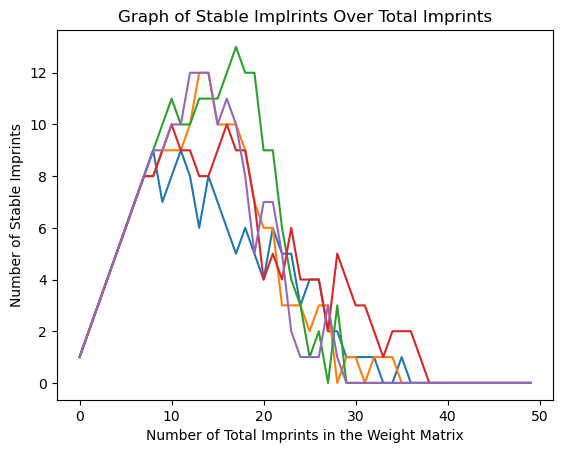

In [14]:
for f in range(5):
    plt.plot(broke[f])

plt.ylabel("Number of Stable Imprints")
plt.xlabel("Number of Total Imprints in the Weight Matrix")
plt.title("Graph of Stable Implrints Over Total Imprints")


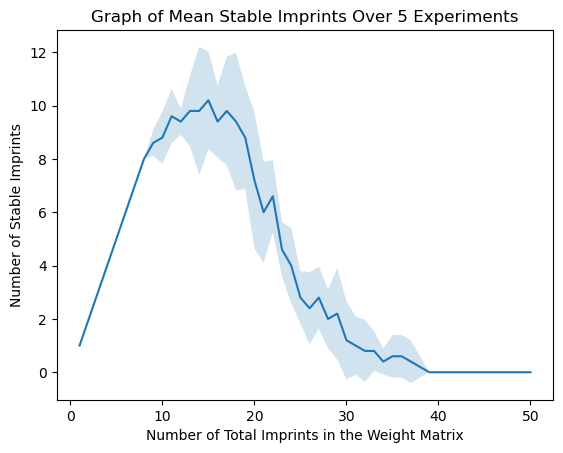

In [15]:

    
xAxis = [i for i in range(1, 51)]
yAxis = broke

plt.title("Graph of Mean Stable Imprints Over 5 Experiments")
plt.xlabel("Number of Total Imprints in the Weight Matrix")
plt.ylabel("Number of Stable Imprints")

meanLine = np.mean(yAxis, axis = 0)
lowstd = meanLine - np.std(yAxis, axis = 0)
highstd = meanLine + np.std(yAxis, axis = 0)

plt.fill_between(xAxis, lowstd, highstd, alpha=.2)
plt.plot(xAxis, meanLine)



In [9]:
# creating an inverse array that has the number of stable inputs
notbroke = []
for i in range(5):
    notbroke.append([])
    for j in range(50):
        notbroke[i].append(((j+1)-broke[i][j])/(j+1))

print(notbroke)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.2727272727272727, 0.25, 0.38461538461538464, 0.5714285714285714, 0.4666666666666667, 0.5625, 0.6470588235294118, 0.7222222222222222, 0.6842105263157895, 0.75, 0.8095238095238095, 0.7272727272727273, 0.782608695652174, 0.7916666666666666, 0.88, 0.8461538461538461, 0.8518518518518519, 0.9285714285714286, 0.9310344827586207, 0.9666666666666667, 0.967741935483871, 0.96875, 0.9696969696969697, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.1, 0.18181818181818182, 0.25, 0.23076923076923078, 0.14285714285714285, 0.2, 0.375, 0.4117647058823529, 0.4444444444444444, 0.5263157894736842, 0.65, 0.7142857142857143, 0.7272727272727273, 0.8695652173913043, 0.875, 0.88, 0.9230769230769231, 0.8888888888888888, 0.8928571428571429, 1.0, 0.9666666666666667, 0.967741935483871, 1.0, 0.9696969696969697, 0.9705882352941176, 0.9714285714285714

Text(0.5, 1.0, 'Graph of Fraction of Unstable Implrints Over Total Imprints')

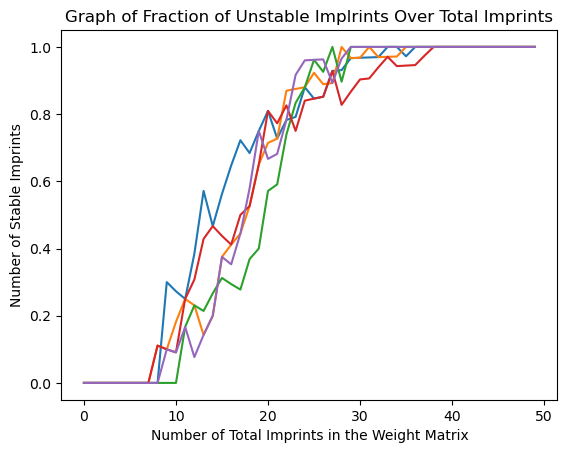

In [11]:
for f in range(5):
    plt.plot(notbroke[f])

plt.ylabel("Fraction of Unstable Imprints")
plt.xlabel("Number of Total Imprints in the Weight Matrix")
plt.title("Graph of Fraction of Unstable Implrints Over Total Imprints")


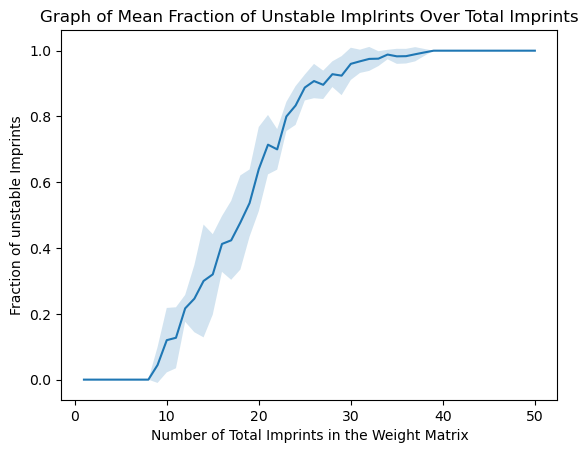

In [13]:
xAxis = [i for i in range(1, 51)]
yAxis = notbroke

plt.title("Graph of Mean Fraction of Unstable Implrints Over Total Imprints")
plt.xlabel("Number of Total Imprints in the Weight Matrix")
plt.ylabel("Fraction of unstable Imprints")

meanLine = np.mean(yAxis, axis = 0)
lowstd = meanLine - np.std(yAxis, axis = 0)
highstd = meanLine + np.std(yAxis, axis = 0)

plt.fill_between(xAxis, lowstd, highstd, alpha=.2)
plt.plot(xAxis, meanLine)